선형회귀

입력과 출력간의 관계(함수)를 선형으로 모델링하는 것
-> 처음 보는 입력에 대해서도 적절한 출력을 얻기 위함

키와 몸무게의 관계를 ax + b로 모델링해서 처음보는 키에 대해서도 적절한 몸무게를 출력하는 머신을 생성할 때, 회귀문제에서 우리가 알아내야하는 것은 "최적의" a, b이다.

최적의 a, b를 찾기 위해서는 Loss(=Cost)를 최소화해야한다.

Loss함수 중 MSE(Mean squared error) 활용

Loss를 최소화하는 a, b를 찾기 위해서는 a, b를 일일히 바꿔가며 Loss값을 그래프로 그려봐야한다.

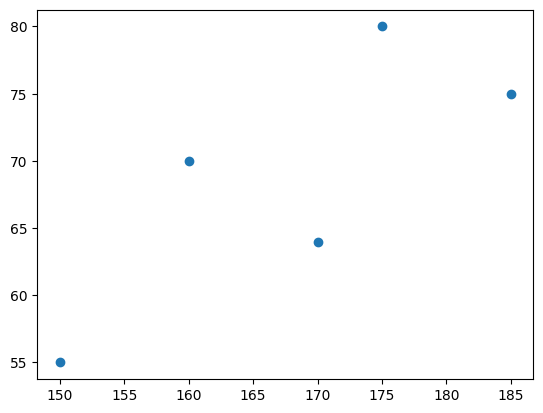

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [150, 160, 170, 175, 185] # 키
y = [55, 70, 64, 80, 75]

plt.plot(x, y, 'o')

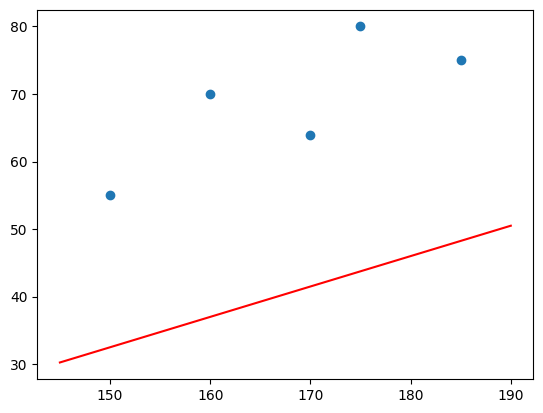

In [20]:
a = 0.45
b = -35
x_plot = np.linspace(145, 190, 100)
y_plot = a * x_plot + b

plt.plot(x, y, 'o')
plt.plot(x_plot, y_plot, 'r')

[[23589.5        23543.35657529 23497.25863351 ...   167.0484233
    166.25147019   165.5       ]
 [23562.12062864 23516.00413777 23469.93312983 ...   166.52209116
    165.75207189   165.02753554]
 [23534.75728932 23488.6677323  23442.62365819 ...   166.01179107
    165.26870564   164.57110314]
 ...
 [ 4252.27480684  4232.98442136  4213.7395188  ...  7602.30333787
   7628.35942399  7654.46099303]
 [ 4240.8793874   4221.61593576  4202.39796704 ...  7617.76095765
   7643.84397761  7669.97248049]
 [ 4229.5         4210.2634822   4191.07244732 ...  7633.23460948
   7659.34456328  7685.5       ]]
optimal a = [0.56626627]
optimal b = [-26.33633634]


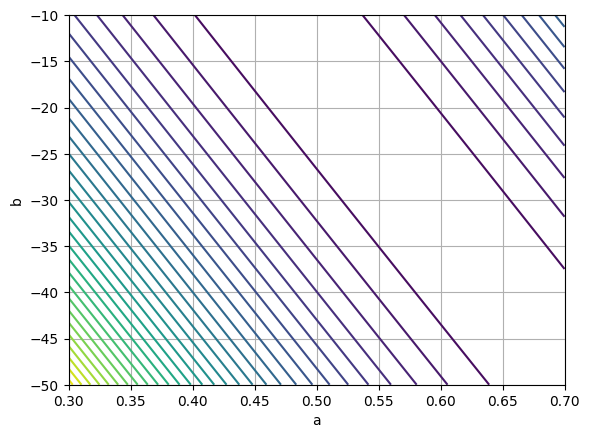

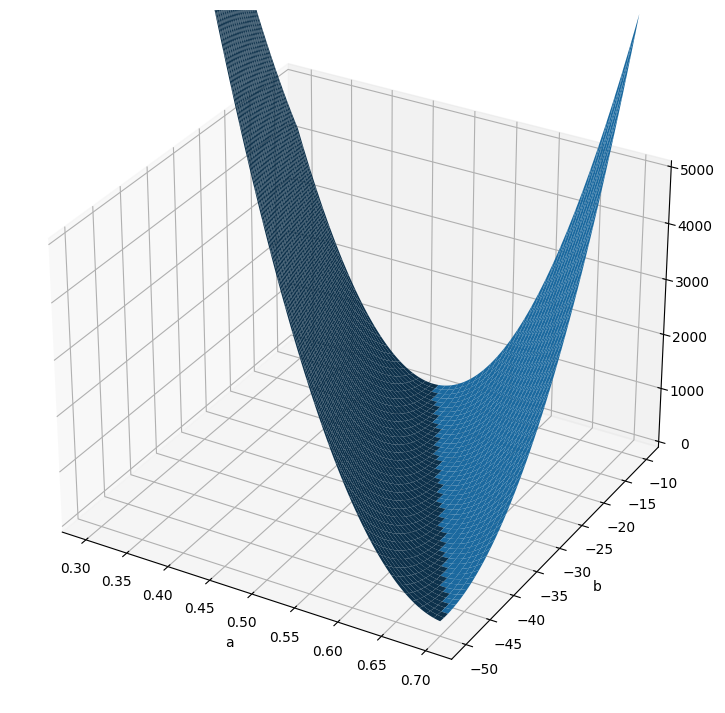

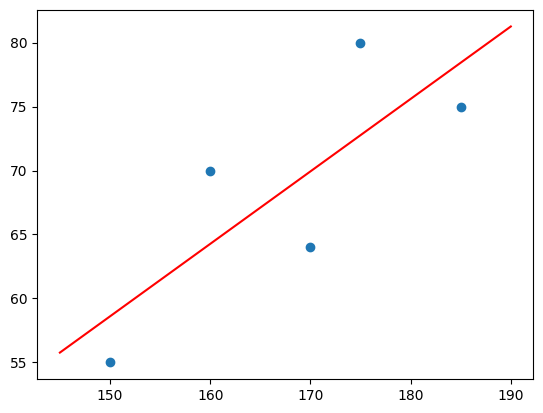

In [21]:
a = 0.5 + np.linspace(-0.2, 0.2, 1000) # 0.3 ~ 0.7까지 100개로 쪼개기
b = -30 + np.linspace(-20, 20, 1000) # -50 ~ -10까지 100개로 쪼개기
A, B = np.meshgrid(a, b)

L = np.zeros_like(A)
# zip(x, y)
# xi, yi

for xi, yi in zip(x, y):
  L += (yi - (A * xi + B))** 2
print(L)
plt.figure()
plt.contour(a, b, L, 30); plt.xlabel("a"); plt.ylabel("b"); plt.grid()

plt.figure(figsize = [10, 9])
ax = plt.axes(projection = "3d")
ax.plot_surface(A, B, L); plt.xlabel("a"); plt.ylabel("b")
ax.set_zlim([0, 5000])

a_opt = A[L == np.min(L)]
b_opt = B[L == np.min(L)]
print(f"optimal a = {a_opt}")
print(f"optimal b = {b_opt}")

plt.figure()
y_plot = a_opt * x_plot + b_opt
plt.plot(x, y, "o")
plt.plot(x_plot, y_plot, 'r')